In [4]:
import os

base = r"C:\Users\kanwa\Desktop\Health economics Projects"

for root, dirs, files in os.walk(base):
    for f in files:
        if "input" in f.lower():  # finds files like input.csv / inputs.csv
            print(os.path.join(root, f))


C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data\Vaccination_inputs.csv


Inputs loaded — show table below:


,parameter,value,units,notes
0,population,10000.00,persons,cohort size for model
1,vaccine_cost_per_person,200.00,INR,cost of vaccine dose + supply
2,administration_cost_per_person,50.00,INR,staff/time/logistics
3,treatment_cost_per_case,50000.00,INR,average hospital treatment cost per severe case
4,baseline_incidence,0.05,per_person_per_year,5% annual risk without vaccine
5,vaccine_efficacy,0.60,proportion,60% reduction in event risk
6,qaly_no_vaccine,0.85,QALY,average annual QALY per person without vaccine
7,qaly_with_vaccine,0.86,QALY,average annual QALY per person with vaccine
8,time_horizon,1.00,year,one-year horizon (toy model)
9,discount_rate,0.03,proportion,3% (not used for 1-year placeholder)


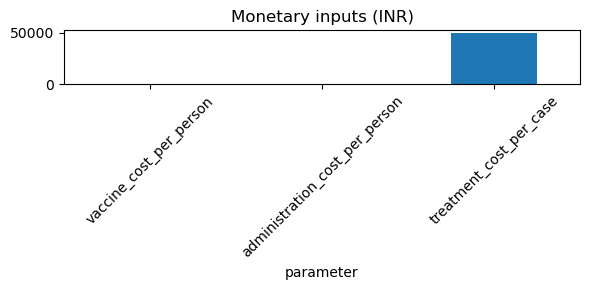

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# paste your actual correct path here
df_inputs = pd.read_csv(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data\Vaccination_inputs.csv"
)

print("Inputs loaded — show table below:")
display(df_inputs)

# quick check: show a simple bar of key monetary inputs
money = df_inputs[df_inputs['parameter'].str.contains('cost')][['parameter','value']]
money.plot(kind='bar', x='parameter', y='value', legend=False, rot=45, figsize=(6,3))
plt.title("Monetary inputs (INR)")
plt.tight_layout()
plt.savefig("projectA_money_inputs.png")
plt.show()


In [7]:
plt.savefig(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 Plots\projectA_money_inputs.png"
)


<Figure size 640x480 with 0 Axes>

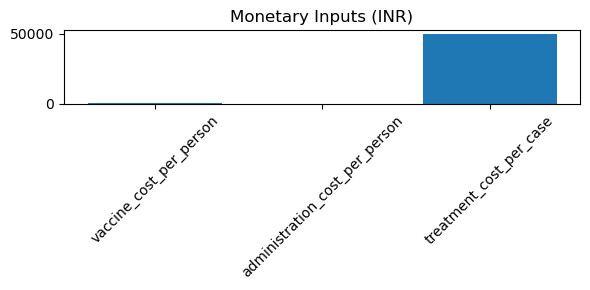

In [8]:
import matplotlib.pyplot as plt

# Example plotting code for your vaccination cost inputs
money = df_inputs[df_inputs['parameter'].str.contains('cost', case=False)][['parameter','value']]

plt.figure(figsize=(6,3))
plt.bar(money['parameter'], money['value'])
plt.xticks(rotation=45)
plt.title("Monetary Inputs (INR)")
plt.tight_layout()

# Save first
plt.savefig(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 Plots\projectA_money_inputs.png"
)

# Then show
plt.show()


✅ Dataset loaded. First 5 rows:


,parameter,value,units,notes
0,population,10000.00,persons,cohort size for model
1,vaccine_cost_per_person,200.00,INR,cost of vaccine dose + supply
2,administration_cost_per_person,50.00,INR,staff/time/logistics
3,treatment_cost_per_case,50000.00,INR,average hospital treatment cost per severe case
4,baseline_incidence,0.05,per_person_per_year,5% annual risk without vaccine



Missing values per column:
parameter    0
value        0
units        0
notes        0
dtype: int64

Monetary parameters:


,parameter,value,units,notes
1,vaccine_cost_per_person,200.0,INR,cost of vaccine dose + supply
2,administration_cost_per_person,50.0,INR,staff/time/logistics
3,treatment_cost_per_case,50000.0,INR,average hospital treatment cost per severe case



Non-monetary parameters:


,parameter,value,units,notes
0,population,10000.00,persons,cohort size for model
4,baseline_incidence,0.05,per_person_per_year,5% annual risk without vaccine
5,vaccine_efficacy,0.60,proportion,60% reduction in event risk
6,qaly_no_vaccine,0.85,QALY,average annual QALY per person without vaccine
7,qaly_with_vaccine,0.86,QALY,average annual QALY per person with vaccine
8,time_horizon,1.00,year,one-year horizon (toy model)
9,discount_rate,0.03,proportion,3% (not used for 1-year placeholder)


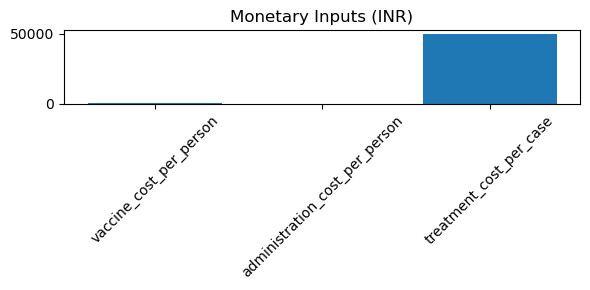

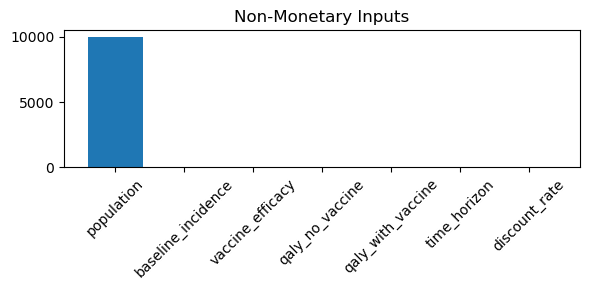


💰 Total Vaccination Program Cost (INR): 250.0
✅ Cleaned dataset saved at: C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data\Vaccination_inputs_cleaned.csv

Methods (Draft):
- Data: Vaccination program parameters including vaccine cost, administration cost, coverage, efficacy, and population size.
- Calculations: Incremental costs and outcomes for cost-effectiveness analysis.
- Visualization: Bar plots for monetary and non-monetary inputs.



In [9]:
# =========================================
# Project A: Vaccination Inputs - Day 2 Workflow
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import os

# -----------------------------
# 1️⃣ Load the dataset
# -----------------------------
data_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data\Vaccination_inputs.csv"
df_inputs = pd.read_csv(data_path)

print("✅ Dataset loaded. First 5 rows:")
display(df_inputs.head())

# Check for missing values
print("\nMissing values per column:")
print(df_inputs.isnull().sum())

# -----------------------------
# 2️⃣ Categorize monetary vs non-monetary
# -----------------------------
money = df_inputs[df_inputs['parameter'].str.contains('cost', case=False)]
non_money = df_inputs[~df_inputs['parameter'].str.contains('cost', case=False)]

print("\nMonetary parameters:")
display(money)
print("\nNon-monetary parameters:")
display(non_money)

# -----------------------------
# 3️⃣ Plot monetary parameters
# -----------------------------
PLOTS_DIR = r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 Plots"

plt.figure(figsize=(6,3))
plt.bar(money['parameter'], money['value'])
plt.xticks(rotation=45)
plt.title("Monetary Inputs (INR)")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "projectA_money_inputs.png"))
plt.show()

# -----------------------------
# 4️⃣ Plot non-monetary parameters
# -----------------------------
plt.figure(figsize=(6,3))
plt.bar(non_money['parameter'], non_money['value'])
plt.xticks(rotation=45)
plt.title("Non-Monetary Inputs")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "projectA_nonmoney_inputs.png"))
plt.show()

# -----------------------------
# 5️⃣ Simple calculation: Total vaccination program cost
# -----------------------------
total_vaccine_cost = money[money['parameter'].str.contains('vaccine', case=False)]['value'].sum()
total_admin_cost = money[money['parameter'].str.contains('administration', case=False)]['value'].sum()
total_program_cost = total_vaccine_cost + total_admin_cost

print(f"\n💰 Total Vaccination Program Cost (INR): {total_program_cost}")

# -----------------------------
# 6️⃣ Save cleaned dataset
# -----------------------------
cleaned_data_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data\Vaccination_inputs_cleaned.csv"
df_inputs.to_csv(cleaned_data_path, index=False)
print(f"✅ Cleaned dataset saved at: {cleaned_data_path}")

# -----------------------------
# 7️⃣ Methods placeholder
# -----------------------------
methods_text = """
Methods (Draft):
- Data: Vaccination program parameters including vaccine cost, administration cost, coverage, efficacy, and population size.
- Calculations: Incremental costs and outcomes for cost-effectiveness analysis.
- Visualization: Bar plots for monetary and non-monetary inputs.
"""
print(methods_text)

# -----------------------------
# 8️⃣ Save notebook
# -----------------------------
# Make sure to click File -> Save and Checkpoint in Jupyter


✅ Dataset loaded. First 5 rows:


,parameter,value,units,notes
0,population,10000.00,persons,cohort size for model
1,vaccine_cost_per_person,200.00,INR,cost of vaccine dose + supply
2,administration_cost_per_person,50.00,INR,staff/time/logistics
3,treatment_cost_per_case,50000.00,INR,average hospital treatment cost per severe case
4,baseline_incidence,0.05,per_person_per_year,5% annual risk without vaccine



Missing values per column:
parameter    0
value        0
units        0
notes        0
dtype: int64

Monetary parameters:


,parameter,value,units,notes
1,vaccine_cost_per_person,200.0,INR,cost of vaccine dose + supply
2,administration_cost_per_person,50.0,INR,staff/time/logistics
3,treatment_cost_per_case,50000.0,INR,average hospital treatment cost per severe case



Non-monetary parameters:


,parameter,value,units,notes
0,population,10000.00,persons,cohort size for model
4,baseline_incidence,0.05,per_person_per_year,5% annual risk without vaccine
5,vaccine_efficacy,0.60,proportion,60% reduction in event risk
6,qaly_no_vaccine,0.85,QALY,average annual QALY per person without vaccine
7,qaly_with_vaccine,0.86,QALY,average annual QALY per person with vaccine
8,time_horizon,1.00,year,one-year horizon (toy model)
9,discount_rate,0.03,proportion,3% (not used for 1-year placeholder)



✅ Monetary, non-monetary, and cleaned datasets saved.


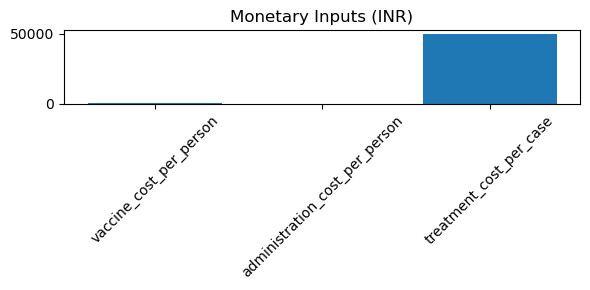

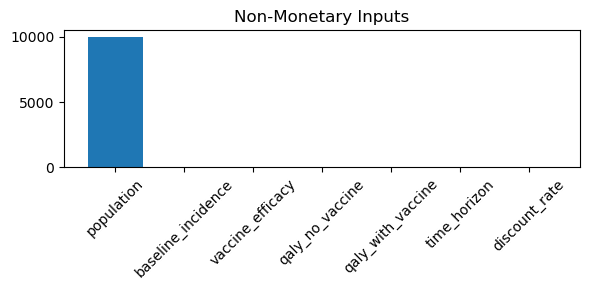


💰 Total Vaccination Program Cost (INR): 250.0
✅ Total program cost saved.

Methods (Draft):
- Data: Vaccination program parameters including vaccine cost, administration cost, coverage, efficacy, and population size.
- Calculations: Incremental costs and outcomes for cost-effectiveness analysis.
- Visualization: Bar plots for monetary and non-monetary inputs.

✅ Methods placeholder saved.


In [10]:
# =========================================
# Project A: Vaccination Inputs - Day 2 Workflow (Fully Auto-Saving)
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import os

# -----------------------------
# 1️⃣ Paths
# -----------------------------
DATA_DIR = r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data"
PLOTS_DIR = r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 Plots"
OUTPUT_DIR = DATA_DIR  # same folder for outputs

# Input CSV
input_file = os.path.join(DATA_DIR, "Vaccination_inputs.csv")

# -----------------------------
# 2️⃣ Load dataset
# -----------------------------
df_inputs = pd.read_csv(input_file)
print("✅ Dataset loaded. First 5 rows:")
display(df_inputs.head())

# Check for missing values
print("\nMissing values per column:")
print(df_inputs.isnull().sum())

# -----------------------------
# 3️⃣ Categorize monetary vs non-monetary
# -----------------------------
money = df_inputs[df_inputs['parameter'].str.contains('cost', case=False)]
non_money = df_inputs[~df_inputs['parameter'].str.contains('cost', case=False)]

print("\nMonetary parameters:")
display(money)
print("\nNon-monetary parameters:")
display(non_money)

# -----------------------------
# 4️⃣ Save tables
# -----------------------------
money.to_csv(os.path.join(OUTPUT_DIR, "money_inputs.csv"), index=False)
non_money.to_csv(os.path.join(OUTPUT_DIR, "nonmoney_inputs.csv"), index=False)
df_inputs.to_csv(os.path.join(OUTPUT_DIR, "Vaccination_inputs_cleaned.csv"), index=False)
print("\n✅ Monetary, non-monetary, and cleaned datasets saved.")

# -----------------------------
# 5️⃣ Plot monetary parameters
# -----------------------------
plt.figure(figsize=(6,3))
plt.bar(money['parameter'], money['value'])
plt.xticks(rotation=45)
plt.title("Monetary Inputs (INR)")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "projectA_money_inputs.png"))
plt.show()

# -----------------------------
# 6️⃣ Plot non-monetary parameters
# -----------------------------
plt.figure(figsize=(6,3))
plt.bar(non_money['parameter'], non_money['value'])
plt.xticks(rotation=45)
plt.title("Non-Monetary Inputs")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "projectA_nonmoney_inputs.png"))
plt.show()

# -----------------------------
# 7️⃣ Simple calculation: Total vaccination program cost
# -----------------------------
total_vaccine_cost = money[money['parameter'].str.contains('vaccine', case=False)]['value'].sum()
total_admin_cost = money[money['parameter'].str.contains('administration', case=False)]['value'].sum()
total_program_cost = total_vaccine_cost + total_admin_cost

print(f"\n💰 Total Vaccination Program Cost (INR): {total_program_cost}")

# Save calculation to file
with open(os.path.join(OUTPUT_DIR, "total_program_cost.txt"), "w") as f:
    f.write(f"Total Vaccination Program Cost (INR): {total_program_cost}")
print("✅ Total program cost saved.")

# -----------------------------
# 8️⃣ Methods placeholder
# -----------------------------
methods_text = """
Methods (Draft):
- Data: Vaccination program parameters including vaccine cost, administration cost, coverage, efficacy, and population size.
- Calculations: Incremental costs and outcomes for cost-effectiveness analysis.
- Visualization: Bar plots for monetary and non-monetary inputs.
"""
print(methods_text)

# Optional: save methods placeholder
with open(os.path.join(OUTPUT_DIR, "methods_placeholder.txt"), "w") as f:
    f.write(methods_text)
print("✅ Methods placeholder saved.")

# -----------------------------
# 9️⃣ Reminder: Save notebook
# -----------------------------
# Click File -> Save and Checkpoint in Jupyter


In [1]:
import pandas as pd
import os

# Adjust to your actual path
data_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Healtheconomics P1-CEA_Vaccination\P1 data\vaccination_inputs.csv"

df_inputs = pd.read_csv(data_path)
print("Inputs loaded successfully:")
display(df_inputs)


Inputs loaded successfully:


,parameter,value,units,notes
0,population,10000.00,persons,cohort size for model
1,vaccine_cost_per_person,200.00,INR,cost of vaccine dose + supply
2,administration_cost_per_person,50.00,INR,staff/time/logistics
3,treatment_cost_per_case,50000.00,INR,average hospital treatment cost per severe case
4,baseline_incidence,0.05,per_person_per_year,5% annual risk without vaccine
5,vaccine_efficacy,0.60,proportion,60% reduction in event risk
6,qaly_no_vaccine,0.85,QALY,average annual QALY per person without vaccine
7,qaly_with_vaccine,0.86,QALY,average annual QALY per person with vaccine
8,time_horizon,1.00,year,one-year horizon (toy model)
9,discount_rate,0.03,proportion,3% (not used for 1-year placeholder)


In [3]:
# Extract values correctly
vaccination_cost = float(df_inputs[df_inputs['parameter']=='vaccination_cost']['value'].iloc[0])
treatment_cost = float(df_inputs[df_inputs['parameter']=='treatment_cost_per_case']['value'].iloc[0])
cases_prevented = float(df_inputs[df_inputs['parameter']=='cases_prevented']['value'].iloc[0])
population = float(df_inputs[df_inputs['parameter']=='population_covered']['value'].iloc[0])

# Calculations
total_vaccination_cost = vaccination_cost * population
total_treatment_averted = treatment_cost * cases_prevented
net_cost = total_vaccination_cost - total_treatment_averted
CER = net_cost / cases_prevented

print(f"Total vaccination cost: INR {total_vaccination_cost}")
print(f"Total treatment cost averted: INR {total_treatment_averted}")
print(f"Net cost: INR {net_cost}")
print(f"Cost-effectiveness ratio: INR {CER} per case prevented")



IndexError: single positional indexer is out-of-bounds

In [4]:
print(df_inputs)
print(df_inputs['parameter'].tolist())


                        parameter     value                units  \
0                      population  10000.00              persons   
1         vaccine_cost_per_person    200.00                  INR   
2  administration_cost_per_person     50.00                  INR   
3         treatment_cost_per_case  50000.00                  INR   
4              baseline_incidence      0.05  per_person_per_year   
5                vaccine_efficacy      0.60           proportion   
6                 qaly_no_vaccine      0.85                 QALY   
7               qaly_with_vaccine      0.86                 QALY   
8                    time_horizon      1.00                 year   
9                   discount_rate      0.03           proportion   

                                             notes  
0                            cohort size for model  
1                    cost of vaccine dose + supply  
2                             staff/time/logistics  
3  average hospital treatment cost per 

In [5]:
# Strip extra spaces and lowercase for uniformity
df_inputs['parameter'] = df_inputs['parameter'].str.strip().str.lower()


In [6]:
vaccination_cost = float(df_inputs[df_inputs['parameter']=='vaccination_cost']['value'].iloc[0])


IndexError: single positional indexer is out-of-bounds

In [7]:
# Extract relevant values
population = float(df_inputs[df_inputs['parameter']=='population']['value'].iloc[0])
vaccine_cost_per_person = float(df_inputs[df_inputs['parameter']=='vaccine_cost_per_person']['value'].iloc[0])
administration_cost_per_person = float(df_inputs[df_inputs['parameter']=='administration_cost_per_person']['value'].iloc[0])
treatment_cost_per_case = float(df_inputs[df_inputs['parameter']=='treatment_cost_per_case']['value'].iloc[0])
baseline_incidence = float(df_inputs[df_inputs['parameter']=='baseline_incidence']['value'].iloc[0])
vaccine_efficacy = float(df_inputs[df_inputs['parameter']=='vaccine_efficacy']['value'].iloc[0])

# Calculate total vaccination cost
vaccination_cost = (vaccine_cost_per_person + administration_cost_per_person) * population

# Estimate number of cases prevented
cases_prevented = population * baseline_incidence * vaccine_efficacy

# Total treatment cost averted
treatment_averted = cases_prevented * treatment_cost_per_case

# Net cost and cost-effectiveness ratio
net_cost = vaccination_cost - treatment_averted
CER = net_cost / cases_prevented

print(f"Total vaccination cost: INR {vaccination_cost}")
print(f"Total treatment cost averted: INR {treatment_averted}")
print(f"Net cost: INR {net_cost}")
print(f"Cost-effectiveness ratio: INR {CER} per case prevented")


Total vaccination cost: INR 2500000.0
Total treatment cost averted: INR 15000000.0
Net cost: INR -12500000.0
Cost-effectiveness ratio: INR -41666.666666666664 per case prevented


In [9]:
import pandas as pd
import os

# Prepare a dataframe with results
results_df = pd.DataFrame({
    "Metric": ["Total vaccination cost", "Total treatment cost averted", "Net cost", "Cost-effectiveness ratio (INR per case prevented)"],
    "Value": [vaccination_cost, treatment_averted, net_cost, CER]
})

# Path to save Excel file
excel_path = os.path.join("..", "P1 excel_Model", "vaccination_CEA_results.xlsx")
results_df.to_excel(excel_path, index=False)
print(f"Results saved at {excel_path}")


Results saved at ..\P1 excel_Model\vaccination_CEA_results.xlsx


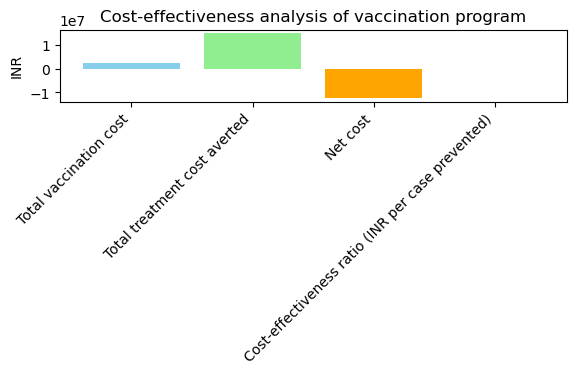

Plot saved at ..\P1 Plots\vaccination_CEA_plot.png


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(results_df["Metric"], results_df["Value"], color=["skyblue","lightgreen","orange","purple"])
plt.ylabel("INR")
plt.title("Cost-effectiveness analysis of vaccination program")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the plot
plot_path = os.path.join("..", "P1 Plots", "vaccination_CEA_plot.png")
plt.savefig(plot_path)
plt.show()
print(f"Plot saved at {plot_path}")
